#### 训练数据迭代器测试代码
---

In [1]:
import tools

PATH = tools.Get_PATH()

In [2]:
import numpy as np 

use_random_iter = True

train_data = np.load("2.npy")
# train_data = np.concatenate([np.load('2.npy'), np.load('3.npy')], 0)    # 注意文件位置
print(train_data.shape)
train_iter = tools.SeqDataLoader(train_data, batch_size=4, num_steps=5, use_random_iter=use_random_iter, path=PATH)
X, Y = next(iter(train_iter))
print(X.shape)
print(Y.shape)

(87, 30, 90, 90)
torch.Size([4, 5, 30, 90, 90])
torch.Size([4, 90, 90])


X -> (b, t, c, h, w)      
Y -> (b, h, w)

In [3]:
X.shape, Y.shape

(torch.Size([4, 5, 30, 90, 90]), torch.Size([4, 90, 90]))

In [4]:
test_data = np.load('1.npy')    # 注意文件位置
test_iter = tools.SeqDataLoader(test_data, batch_size=4, num_steps=5, use_random_iter=use_random_iter)

#### 网络输出测试代码
---

In [5]:
from nets import ConvGRU as net

device = tools.try_gpu()

RNN = net(input_dim=30, hidden_dim=64, kernel_size=3, dec_kernel_size=3,
            num_layers=2, batch_first=True, bias=True).to(device)

In [6]:
RNN.summary(PATH)

In [7]:
# pred, _ = RNN(X.to(device))
# pred.shape

#### 训练测试代码
---

MSE: 22.982238; 16.2 pictures/sec on cuda:0


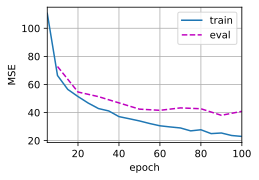

In [8]:
tools.train(RNN, train_iter, 0.0005, 100, device, use_random_iter=use_random_iter, weigth_decay=1e-5, path=PATH, eval=test_iter)

#### 模型加载与保存
---

In [9]:
# tools.save(RNN, PATH)

In [10]:
# tools.load(RNN, PATH, device)